#### Flight Price Prediction

###### Import Libraries

In [1009]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder,StandardScaler

import warnings
warnings.filterwarnings('ignore')

###### Load Dataset

In [1010]:
pd.pandas.set_option('display.max_columns',None)
df_train=pd.read_excel('E:\Data Trained_ Training\DataTrained___Evaluation Projects\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')
df_test=pd.read_excel('E:\Data Trained_ Training\DataTrained___Evaluation Projects\Flight_Ticket_Participant_Datasets\Test_set.xlsx')
df_sample=pd.read_excel('E:\Data Trained_ Training\DataTrained___Evaluation Projects\Flight_Ticket_Participant_Datasets\Sample_submission.xlsx')

###### Dimension of Data

###### -Train Dataset

In [1011]:
df_train.shape

(10683, 11)

*Observation :*<br>*In train Dataset there are 10683 rows and 11 columns*

###### -Test Dataset

In [1012]:
df_test.shape

(2671, 10)

*Observation :*<br>*In test Dataset there are 2671 rows and 10 columns*

###### -Sample_set

In [1013]:
df_sample.shape

(2671, 1)

*Observation :*<br>*In train Dataset there are 2671 rows and 1 columns*

###### Sample of Data

###### -Train Dataset

In [1014]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


###### -Test Dataset

In [1015]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


###### -Sample_set

In [1016]:
df_sample.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


###### Brief about Data

###### -Train Data

In [1017]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


*Observation :*<br>*In train Dataset there are 1 int type column and 10 object type column*
<br>*Each column have not have 10683 Non null values means have missing values*

###### -Test Data

In [1018]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


*Observation :*<br>*In test Dataset there are  5 float type and 4 int type column*
<br>*Each column have 2670 Non null values means have 1 missing value*

###### -Sample_set

In [1019]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   2671 non-null   int64
dtypes: int64(1)
memory usage: 21.0 KB


*Observation :*<br>*In sample Dataset there are 1 int type column*
<br>*column have 2671 Non null values means have no missing values*

###### Concatenate test and sample dataset

In [1020]:
df_test=pd.concat([df_test,df_sample],axis=1)

###### Statistical Summary of Data

###### for train dataset

###### ---for numerical variable

In [1021]:
df_train.describe(exclude='object')

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


###### ---for Categorical variable

In [1022]:
df_train.describe(include=[object]) 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


###### for test dataset

###### ---for numerical variable

In [1023]:
df_test.describe(exclude='object')

,Price
count,2671.000000
mean,20159.514414
std,5005.399225
min,10138.000000
25%,16469.500000
50%,19582.000000
75%,23476.500000
max,64881.000000


###### ---for Categorical variable

In [1024]:
df_test.describe(include=[object]) 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


###### check for unique values in columns

In [1025]:
#for train dataset

In [1026]:
df_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [1027]:
#for test dataset

In [1028]:
df_test.nunique()

Airline              11
Date_of_Journey      44
Source                5
Destination           6
Route               100
Dep_Time            199
Arrival_Time        704
Duration            320
Total_Stops           5
Additional_Info       6
Price              2462
dtype: int64

*Observation :*<br>*In train and test Dataset Airline,Source, Destination,Total_stops,Additional_Info column
are categorical and rest are countinuos*

###### check for missing values in columns

In [1029]:
#for train dataset

In [1030]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [1031]:
print("Total missing values :",df_train.isnull().sum().sum())

Total missing values : 2


In [1032]:
#for train dataset

In [1033]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [1034]:
print("Total missing values :",df_test.isnull().sum().sum())

Total missing values : 0


###### total % missing values in columns

In [1035]:
#for train dataset

In [1036]:
print("Total % of MIssing Values in Columns :")
df_train.isnull().sum()/df_train.shape[0]*100 

Total % of MIssing Values in Columns :


Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

*Observation :*<br>*In train Dataset Route and Total_stops column have less than 1% missing value*

###### check for duplicate rows

In [1037]:
sum(df_train.duplicated())

220

In [1038]:
sum(df_test.duplicated())

0

*Observation :*<br>*Only in train Dataset 220 Duplicate rows*

###### check for zeros in columns

In [1045]:
#for train dataset

In [1046]:
print(df_train[df_train==0].count())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [1047]:
print('Total zeros in Dataset:', df_train[df_train==0].count().sum())

Total zeros in Dataset: 0


In [1048]:
#for test dataset

In [1049]:
print(df_test[df_test==0].count())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [1050]:

print('Total zeros in Dataset:', df_test[df_test==0].count().sum())

Total zeros in Dataset: 0


*Observation :*<br>*In train and test Dataset there are no zero as values*

###### Identification of variables

###### in train dataset

###### check for numerical variables 

In [1051]:
Train_numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
print('Number of numerical variables: ', len(Train_numerical_features))

Number of numerical variables:  1


In [1052]:
for feature in Train_numerical_features:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df_train[feature].unique())))

The feature is Price and number of numerical are 1870


In [1053]:
df_train[Train_numerical_features].head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


###### ---check for descrete variable

In [1054]:
Train_descrete_feature=[feature for feature in Train_numerical_features if len(df_train[feature].unique())<25]
print("Descrete Variables Count: {}".format(len(Train_descrete_feature)),"\n")

for feature in Train_descrete_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df_train[feature].unique())))
    
    
for feature in Train_descrete_feature:
    print("\n",feature," : ", df_train[feature].unique())

Descrete Variables Count: 0 



###### ---check for countinuous variable

In [1055]:
Train_continuous_feature=[feature for feature in Train_numerical_features if feature not in Train_descrete_feature ]
print("Continuous Variables Count {}".format(len(Train_continuous_feature)),"\n")

for feature in Train_continuous_feature:
    print('The feature is:  {}     and number of numerical are:  {}'.format(feature,len(df_train[feature].unique())))

Continuous Variables Count 1 

The feature is:  Price     and number of numerical are:  1870


In [1056]:
df_train[Train_continuous_feature].head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


###### check for categorical variable

In [1057]:
Train_categorical_features=[feature for feature in df_train.columns if df_train[feature].dtypes=='O']
print('Number of Categorical variables: ', len(Train_categorical_features))

Number of Categorical variables:  10


In [1058]:
for feature in Train_categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_train[feature].unique())))

The feature is Airline and number of categories are 12
The feature is Date_of_Journey and number of categories are 44
The feature is Source and number of categories are 5
The feature is Destination and number of categories are 6
The feature is Route and number of categories are 129
The feature is Dep_Time and number of categories are 222
The feature is Arrival_Time and number of categories are 1343
The feature is Duration and number of categories are 368
The feature is Total_Stops and number of categories are 6
The feature is Additional_Info and number of categories are 10


In [1059]:
df_train[Train_categorical_features].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


###### ---check for binary variable

In [1060]:
Train_binary_feature=[feature for feature in Train_categorical_features if len(df_train[feature].unique())==2 or len(df_train[feature].unique())<2 and feature not in date_feature]
print("Binary Variables Count: {}".format(len(Train_binary_feature)))

Binary Variables Count: 0


###### ---check for nominal variable

In [1061]:
Train_nominal_feature=[feature for feature in Train_categorical_features if feature not in Train_binary_feature]
print("Nominal feature Count {}".format(len(Train_nominal_feature)))

Nominal feature Count 10


In [1062]:
for feature in Train_nominal_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df_train[feature].unique())))

The feature is Airline and number of numerical are 12
The feature is Date_of_Journey and number of numerical are 44
The feature is Source and number of numerical are 5
The feature is Destination and number of numerical are 6
The feature is Route and number of numerical are 129
The feature is Dep_Time and number of numerical are 222
The feature is Arrival_Time and number of numerical are 1343
The feature is Duration and number of numerical are 368
The feature is Total_Stops and number of numerical are 6
The feature is Additional_Info and number of numerical are 10


In [1063]:
#nominalfeature=['Gender','Married','Dependents','Self_Employed','Property_Area']
for feature in Train_nominal_feature :
    print(feature," : ", df_train[feature].unique())

Airline  :  ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey  :  ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source  :  ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination  :  ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route  :  ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → CO

In [1064]:
df_train[Train_nominal_feature].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


###### in test dataset

###### check for numerical variables

In [1065]:
Test_numerical_features = [feature for feature in df_test.columns if df_test[feature].dtypes != 'O']
print('Number of numerical variables: ', len(Test_numerical_features))

Number of numerical variables:  1


In [1066]:
for feature in Test_numerical_features:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df_test[feature].unique())))


The feature is Price and number of numerical are 2462


In [1067]:
df_test[Test_numerical_features].head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


###### ---check for descrete variable

In [1068]:
Test_descrete_feature=[feature for feature in Test_numerical_features if len(df_test[feature].unique())<25]
print("Descrete Variables Count: {}".format(len(Test_descrete_feature)),"\n")

for feature in Test_descrete_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df_test[feature].unique())))

for feature in Test_descrete_feature:
    print("\n",feature," : ", df_test[feature].unique())
    

Descrete Variables Count: 0 



###### ---check for countinuous variable

In [1069]:
Test_continuous_feature=[feature for feature in Test_numerical_features if feature not in Test_descrete_feature ]
print("Continuous Variables Count {}".format(len(Test_continuous_feature)),"\n")

for feature in Test_continuous_feature:
    print('The feature is:  {}     and number of numerical are:  {}'.format(feature,len(df_test[feature].unique())))

Continuous Variables Count 1 

The feature is:  Price     and number of numerical are:  2462


In [1070]:
df_test[Test_continuous_feature].head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


###### check for categorical variable

In [1071]:
Test_categorical_features=[feature for feature in df_test.columns if df_test[feature].dtypes=='O']
print('Number of Categorical variables: ', len(Test_categorical_features))

Number of Categorical variables:  10


In [1072]:
for feature in Test_categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_test[feature].unique())))

The feature is Airline and number of categories are 11
The feature is Date_of_Journey and number of categories are 44
The feature is Source and number of categories are 5
The feature is Destination and number of categories are 6
The feature is Route and number of categories are 100
The feature is Dep_Time and number of categories are 199
The feature is Arrival_Time and number of categories are 704
The feature is Duration and number of categories are 320
The feature is Total_Stops and number of categories are 5
The feature is Additional_Info and number of categories are 6


In [1073]:
df_test[Test_categorical_features].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


###### ---check for binary variable

In [1074]:
Test_binary_feature=[feature for feature in Test_categorical_features if len(df_test[feature].unique())==2 or len(df_test[feature].unique())<2 and feature not in date_feature]
print("Binary Variables Count: {}".format(len(Test_binary_feature)))

Binary Variables Count: 0


###### ---check for nominal variable

In [1075]:
Test_nominal_feature=[feature for feature in Test_categorical_features if feature not in Test_binary_feature]
print("Nominal feature Count {}".format(len(Test_nominal_feature)))

Nominal feature Count 10


In [1076]:
for feature in Test_nominal_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df_test[feature].unique())))

The feature is Airline and number of numerical are 11
The feature is Date_of_Journey and number of numerical are 44
The feature is Source and number of numerical are 5
The feature is Destination and number of numerical are 6
The feature is Route and number of numerical are 100
The feature is Dep_Time and number of numerical are 199
The feature is Arrival_Time and number of numerical are 704
The feature is Duration and number of numerical are 320
The feature is Total_Stops and number of numerical are 5
The feature is Additional_Info and number of numerical are 6


In [1077]:
for feature in Test_nominal_feature :
    print(feature," : ", df_test[feature].unique())

Airline  :  ['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Air India'
 'Vistara' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business']
Date_of_Journey  :  ['6/06/2019' '12/05/2019' '21/05/2019' '24/06/2019' '12/06/2019'
 '12/03/2019' '1/05/2019' '15/03/2019' '18/05/2019' '21/03/2019'
 '15/06/2019' '15/05/2019' '3/06/2019' '06/03/2019' '24/03/2019'
 '6/03/2019' '9/05/2019' '18/03/2019' '6/04/2019' '1/06/2019' '3/03/2019'
 '27/03/2019' '9/06/2019' '3/05/2019' '1/04/2019' '18/06/2019'
 '15/04/2019' '6/05/2019' '9/03/2019' '3/04/2019' '27/06/2019'
 '21/06/2019' '21/04/2019' '18/04/2019' '9/04/2019' '24/05/2019'
 '01/03/2019' '09/03/2019' '27/05/2019' '03/03/2019' '27/04/2019'
 '1/03/2019' '24/04/2019' '12/04/2019']
Source  :  ['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']
Destination  :  ['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad' 'Kolkata']
Route  :  ['DEL → BOM → COK' 'CCU → MAA → BLR' 'BLR → DEL' 'BLR → TRV → DEL'


In [1078]:
df_test[Test_nominal_feature].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


###### check for cardinality

###### ---for categorical variables

###### in Train Dataset

Text(0.5, 1.0, 'Cardinality')

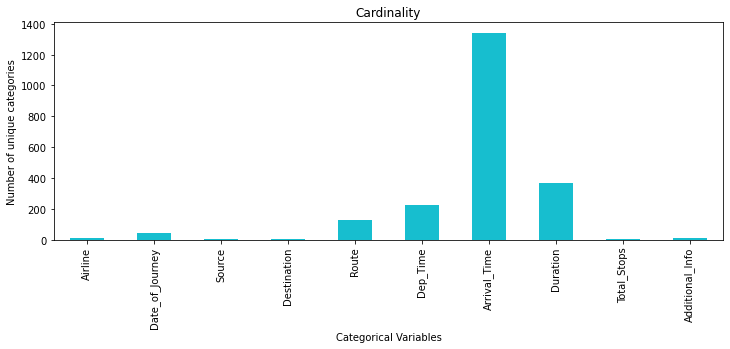

In [1079]:
df_train[Train_categorical_features].nunique().plot.bar(figsize=(12,4),color='#17becf')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

###### in Test Dataset

Text(0.5, 1.0, 'Cardinality')

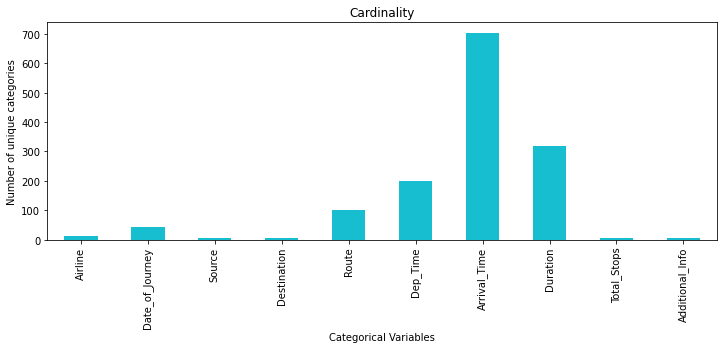

In [1080]:
df_test[Test_categorical_features].nunique().plot.bar(figsize=(12,4),color='#17becf')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

###### check for outliers

###### ---for numerical variables

###### in train Dataset

<AxesSubplot:>

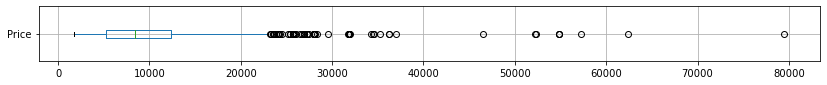

In [1081]:
df_train.boxplot(column='Price', figsize=(14,1),vert=False)

###### in test dataset

<AxesSubplot:>

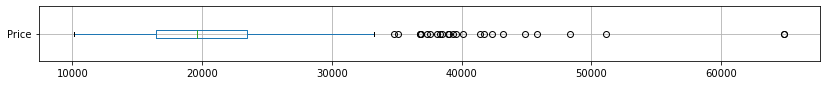

In [1082]:
df_test.boxplot(column='Price', figsize=(14,1),vert=False)

*Observation :*<br>*In test and train Dataset there are outliers in Price column*

###### check for skewness

###### in Train Dataset

Price    1.812552
dtype: float64


<AxesSubplot:>

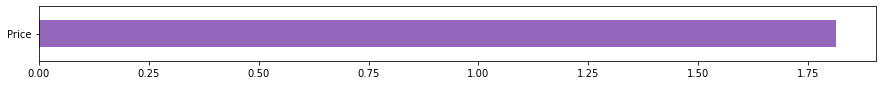

In [1083]:
print(df_train.skew())
df_train.skew().plot(kind='barh',color='#9467bd',figsize=(15,1))

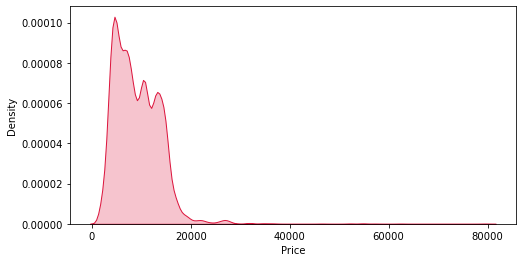

In [1084]:
#Visualization of Skewness (numerical variable)
plt.figure(figsize=(8,4))
sns.kdeplot(df_train['Price'],color='crimson',shade=True)
plt.show()


###### in test Dataset

Price    1.269201
dtype: float64


<AxesSubplot:>

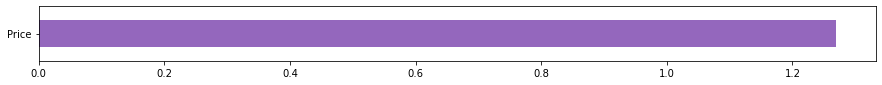

In [1085]:
print(df_test.skew())
df_test.skew().plot(kind='barh',color='#9467bd',figsize=(15,1))

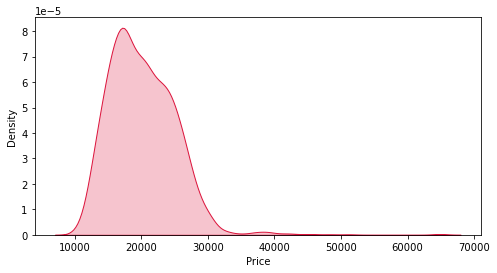

In [1086]:
#Visualization of Skewness (numerical variable)
plt.figure(figsize=(8,4))
sns.kdeplot(df_test['Price'],color='crimson',shade=True)
plt.show()


###### Identify Target and Feature Variable

*Prediction-*<br>*Flight Price Prediction*

*Targe Variable (Depaendent Features)* <br>            *-Price* <br>
*Predictors (Independent Features)*<br>                 *- All variables* 

###### Univariate Analysis

###### 1. Airline variable

<AxesSubplot:>

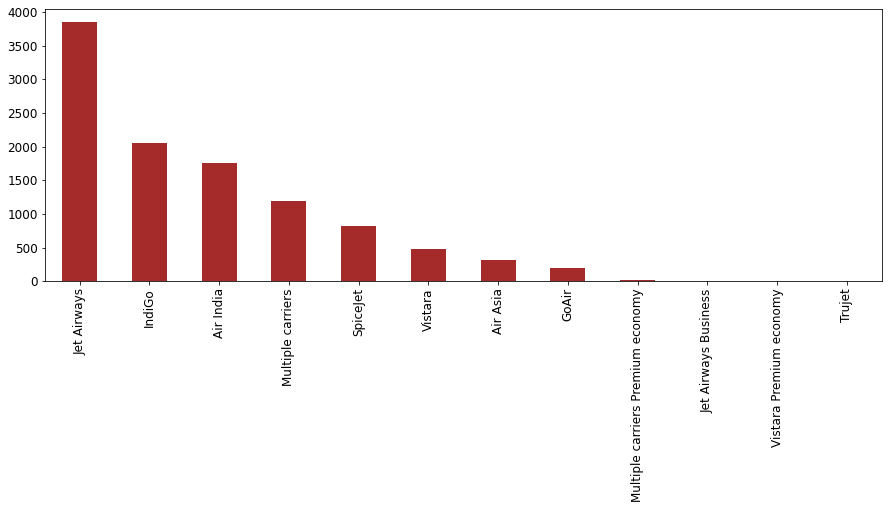

In [1087]:
df_train['Airline'].value_counts().plot(kind = "bar",fontsize=12,figsize=(15,5),color='brown')

*Observation :*<br>*In Airline column Jet Airways have max count*
<br>*and Premium and Business class booking is least*

###### 2. Date_of_Journey variable

<AxesSubplot:>

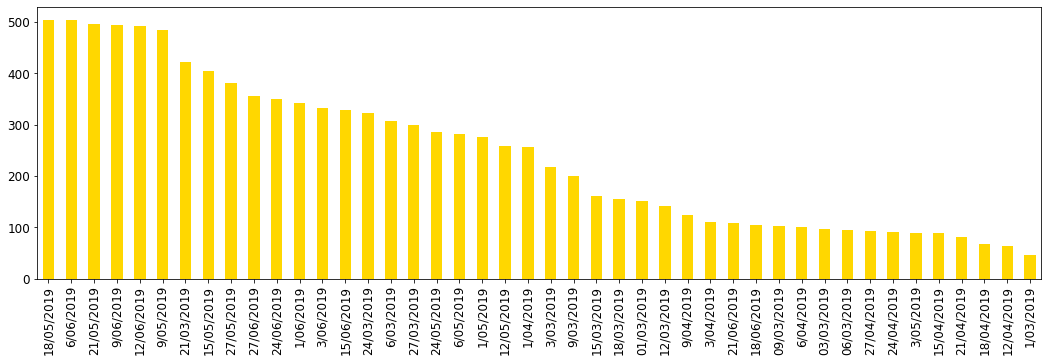

In [808]:
df_train['Date_of_Journey'].value_counts().plot(kind = "bar",fontsize=12,figsize=(18,5),color='gold')

*Observation :*<br>*In day_of_journey column max count is between 9 may to 12 june*
<br>*least is on 1 march*

###### 3. Source variable

<AxesSubplot:ylabel='Source'>

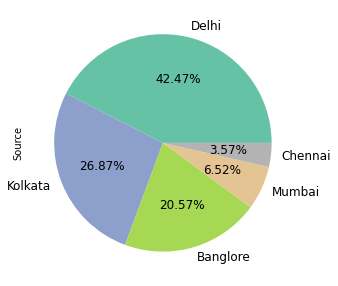

In [1088]:
df_train['Source'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='Set2')

*Observation :*<br>*In Source column max (42%) flight source is Delhi*
<br>*banglore 20%, kolkata 26% is 2nd max count*
<br>*Mumbai,Chennai have least source flights*

###### 4. Destination variable

<AxesSubplot:ylabel='Destination'>

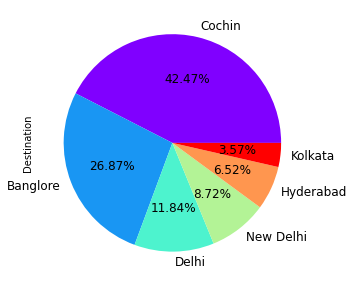

In [810]:
df_train['Destination'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='rainbow')

*Observation :*<br>*In 42% fight have Cochin Destination,26% have Banglore,11% have Delhi, 8% New delhi,6% hydrabad, 3% Kolkata*

###### 5. Route variable

<AxesSubplot:>

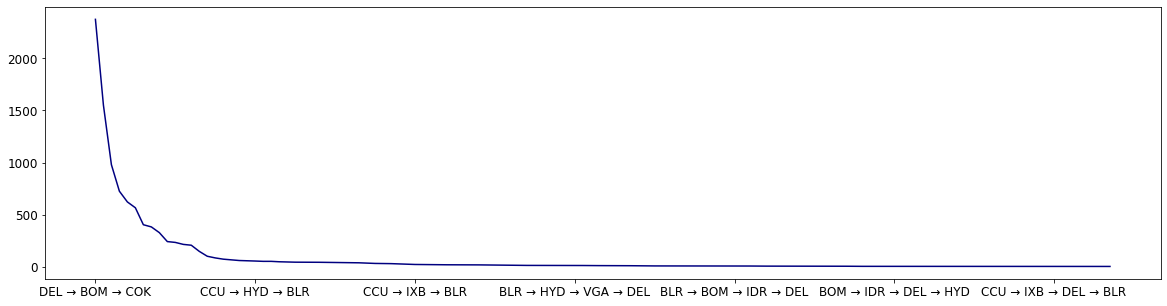

In [1091]:
df_train['Route'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,5),color='navy')

*Observation :*<br>*In Route column max count DEL-BOM-COK and CCU-HYD-BIR*
<br>*rest have very least count*

###### 6. Dep_Time variable

<AxesSubplot:>

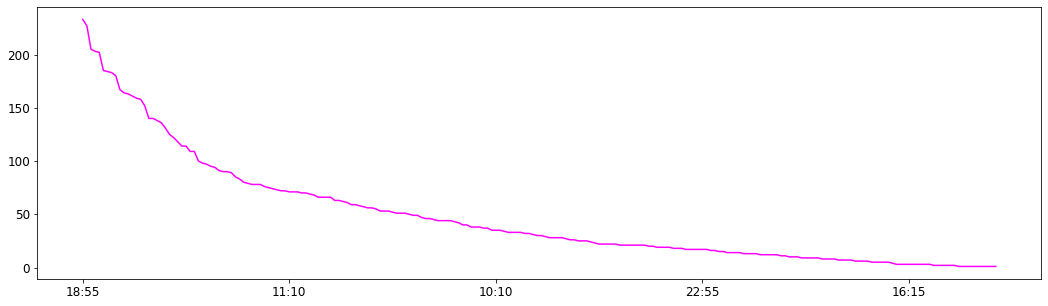

In [1094]:
df_train['Dep_Time'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='magenta')

*Observation :*<br>*In Dep_time column max count is 18:55,11:10,10:10*
<br>*rest have least count*

###### 7. Arrival_Time variable

In [815]:
df_train['Arrival_Time'].nunique()

1343

<AxesSubplot:>

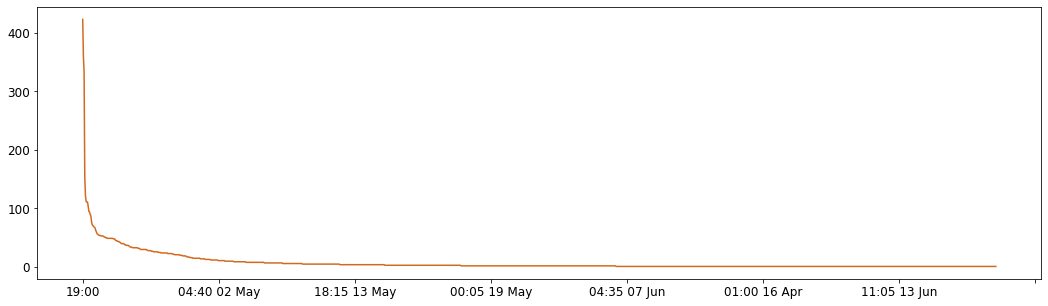

In [1096]:
df_train['Arrival_Time'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='Chocolate')

*Observation :*<br>*In Arrival_Time column 19:00 have max count and rest have least count*

###### 8. Duration variable

<AxesSubplot:>

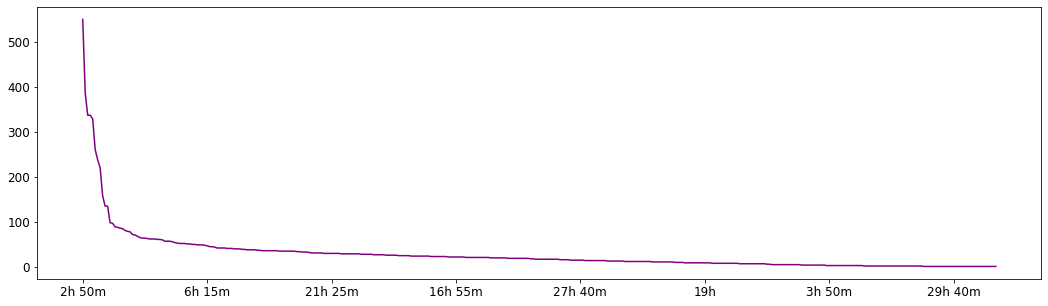

In [1097]:
df_train['Duration'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='purple')

*Observation :*<br>*In Duration max flight source to destination reaching hime is 2h50 min*
<br>*rest have least count*

###### 9. Total_Stops variable

<AxesSubplot:ylabel='Total_Stops'>

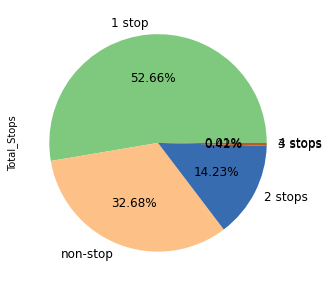

In [819]:
df_train['Total_Stops'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='Accent')

*Observation :*<br>*In Total_tops column 52% fight have only 1 stop,14% flight have 2 stops, 
0.02% flight have 3 stops,32% flight have Non-stops*

###### 10. Additional_Info variable

<AxesSubplot:>

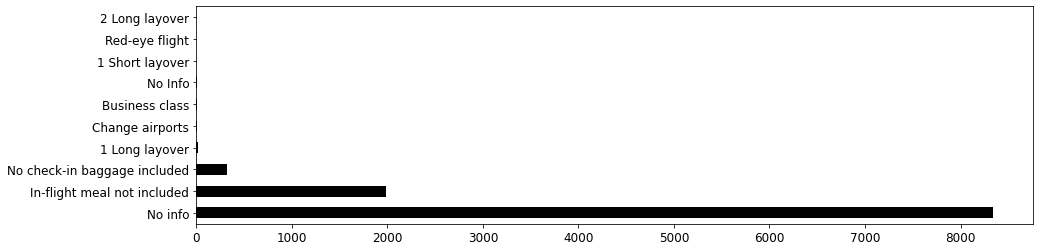

In [1098]:
df_train['Additional_Info'].value_counts().plot(kind = "barh",fontsize=12,figsize=(15,4),color='black')

*Observation :*<br>*maximum count is of no information, only meal include/no check in baggage etc haves least info*

###### 11. Price variable

<AxesSubplot:>

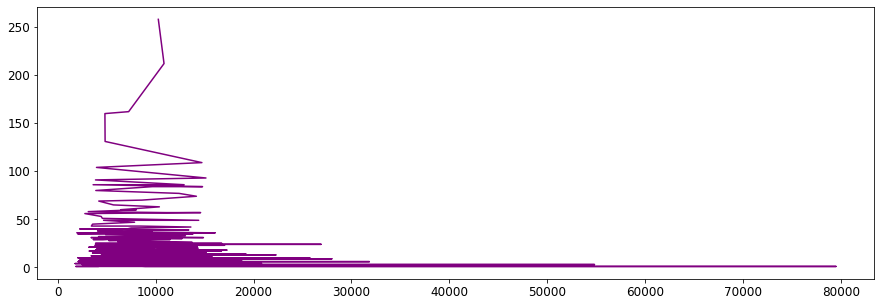

In [1107]:
#df_train['Price'].value_counts().plot(kind = "line",fontsize=12,figsize=(15,5),color='purple')
df_train['Price'].value_counts().plot(kind = "line",fontsize=12,figsize=(15,5),color='purple')

*Observation :*<br>*In Price column maximum between 0 to 20000  and rest have 25000 to 80000 least count*

###### Bivariate Analysis

###### 1.Price Vs 
            Airline
            Date_of_Journey
            Source
            Destination
            Route
            Dep_Time
            Arrival_Time
            Duration
            Total_Stops
            Additional_Info

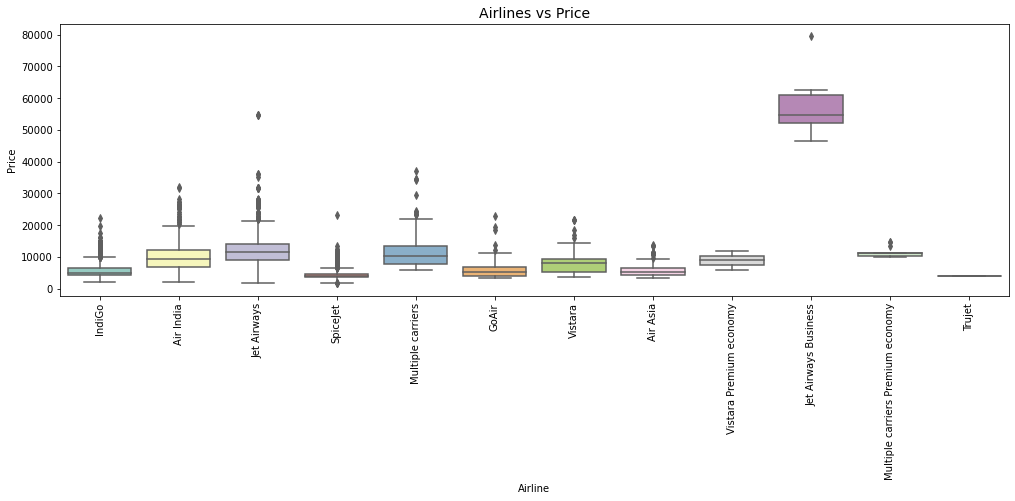

In [1108]:
plt.figure(figsize=(17,5))
sns.boxplot(df_train['Airline'], df_train['Price'], palette='Set3')
plt.title('Airlines vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*All Airlines have approx same price but jet Airways Business price is hightest*

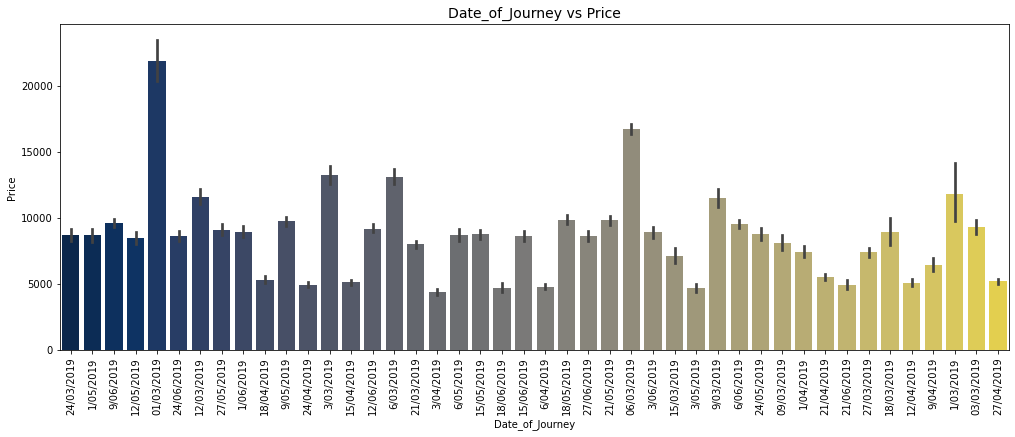

In [823]:
plt.figure(figsize=(17,6))
sns.barplot(df_train['Date_of_Journey'], df_train['Price'], palette='cividis')
plt.title('Date_of_Journey vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*price of the flight in least in the month of april and max in the month of march*
<br>*fight ticket price is high in the starting date of the month 1 to 15 and price is low on last days of the month*

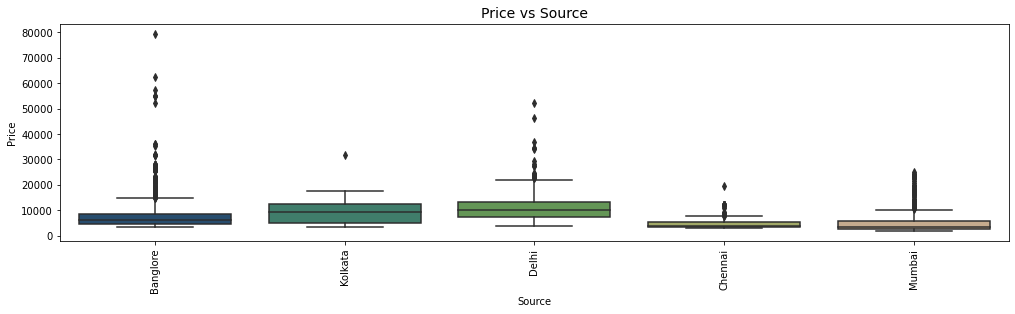

In [1109]:
plt.figure(figsize=(17,4))
sns.boxplot(df_train['Source'], df_train['Price'], palette='gist_earth')
plt.title('Price vs Source', size=14)
plt.xticks(rotation=90)
plt.show()


*Observation :*<br>*Source delhi have max ticket price. and the other sources have approx same price for ticket*

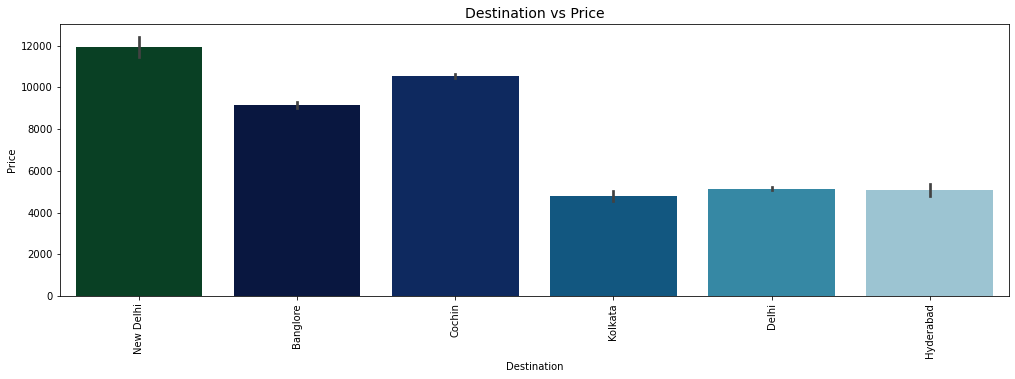

In [825]:
plt.figure(figsize=(17,5))
sns.barplot(df_train['Destination'], df_train['Price'], palette='ocean')
plt.title('Destination vs Price', size=14)
plt.xticks(rotation=90)
plt.show()


*Observation :*<br>*New Delhi, Banglore and Cochin have max ticket price and rest have min*

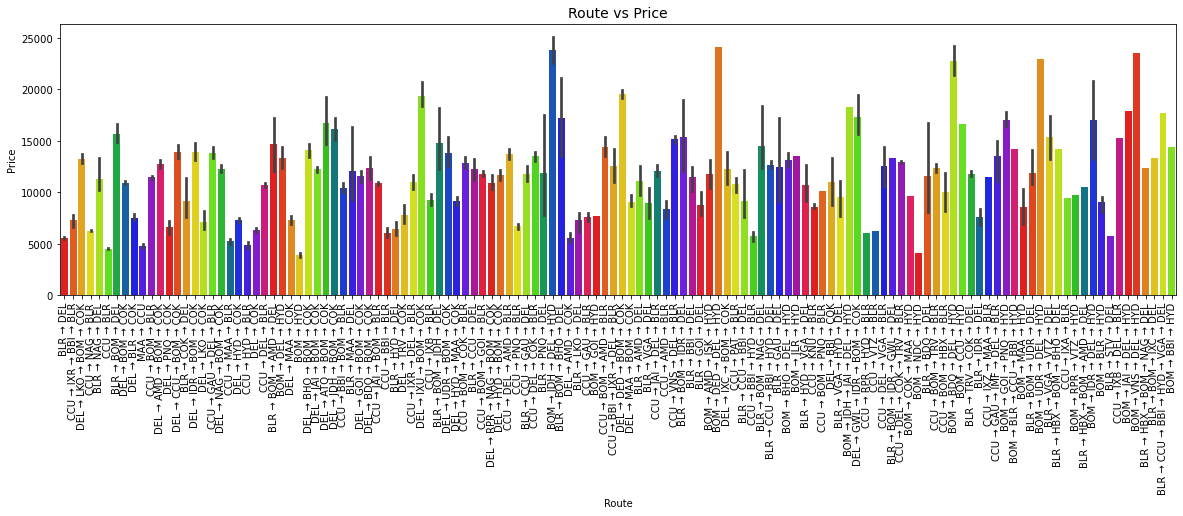

In [826]:
plt.figure(figsize=(20,5))
sns.barplot(df_train['Route'], df_train['Price'], palette='prism')
plt.title('Route vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*short route fare is min and long route have max ticket fare*

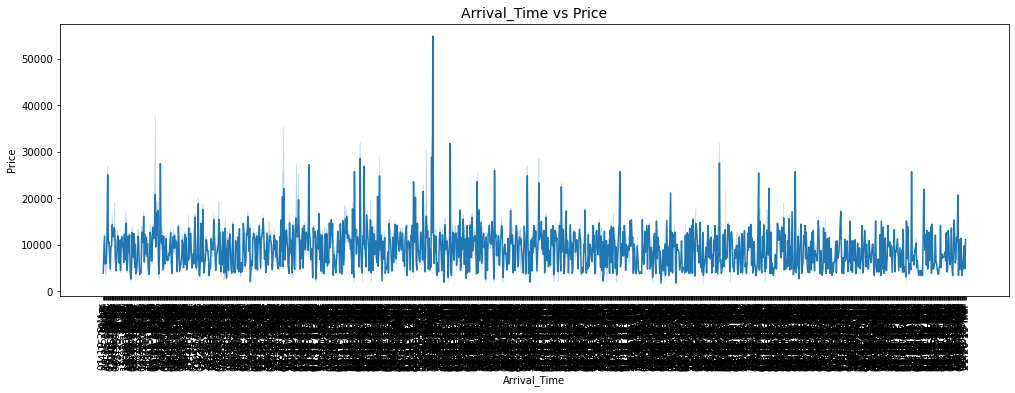

In [1110]:
plt.figure(figsize=(17,5))
sns.lineplot(df_train['Arrival_Time'], df_train['Price'], palette='inferno')
plt.title('Arrival_Time vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*price is approx same for every arrival time*

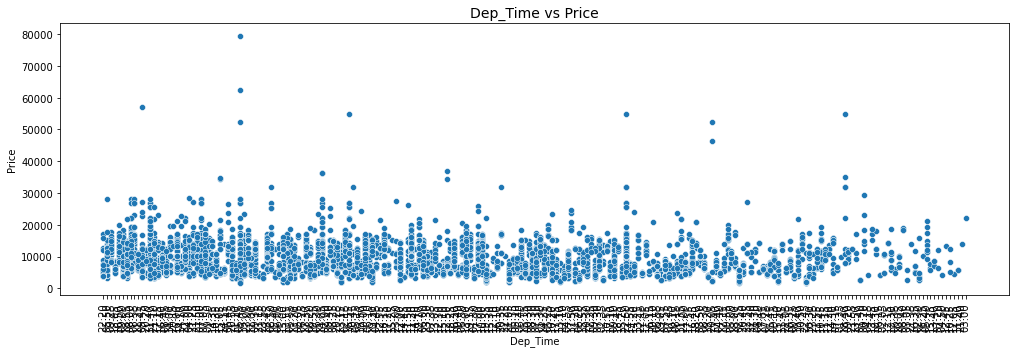

In [828]:
plt.figure(figsize=(17,5))
sns.scatterplot(df_train['Dep_Time'], df_train['Price'], palette='pastel1')
plt.title('Dep_Time vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*In Price is highest in the range 0 to 15000for every Depture hours*

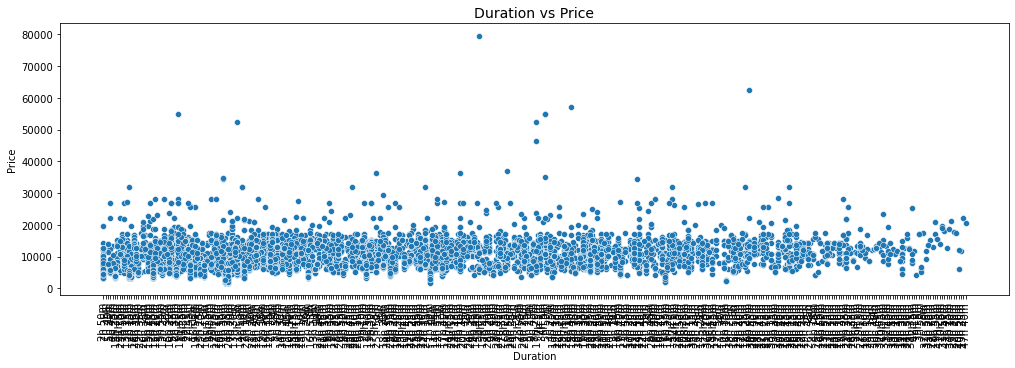

In [829]:
plt.figure(figsize=(17,5))
sns.scatterplot(df_train['Duration'], df_train['Price'], palette='Set2')
plt.title('Duration vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*In Price is maximum between 0 to 20000  and rest have 25000 to 80000 least count for Duration column*

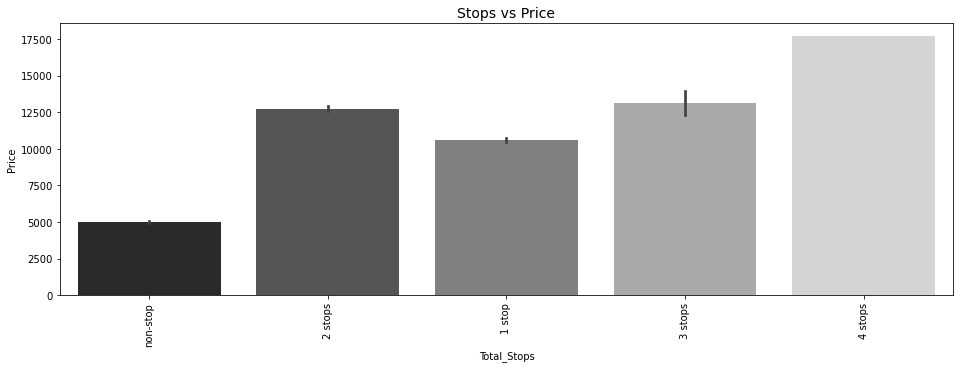

In [1111]:
plt.figure(figsize=(16,5))
sns.barplot(df_train['Total_Stops'], df_train['Price'], palette='binary_r')
plt.title('Stops vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*price increase with the stops increase*

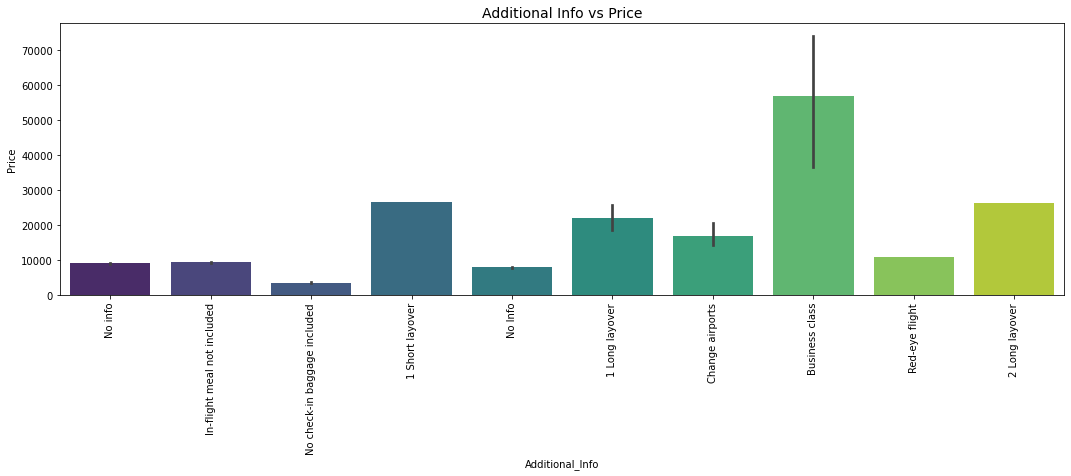

In [831]:
plt.figure(figsize=(18,5))
sns.barplot(df_train['Additional_Info'], df_train['Price'], palette='viridis')
plt.title('Additional Info vs Price', size=14)
plt.xticks(rotation=90)
plt.show()


*Observation :*<br>*In Price maximum for business class, 2nd high for 1long/short layover,2long layover and least with the other information*

###### Multivariate Analysis

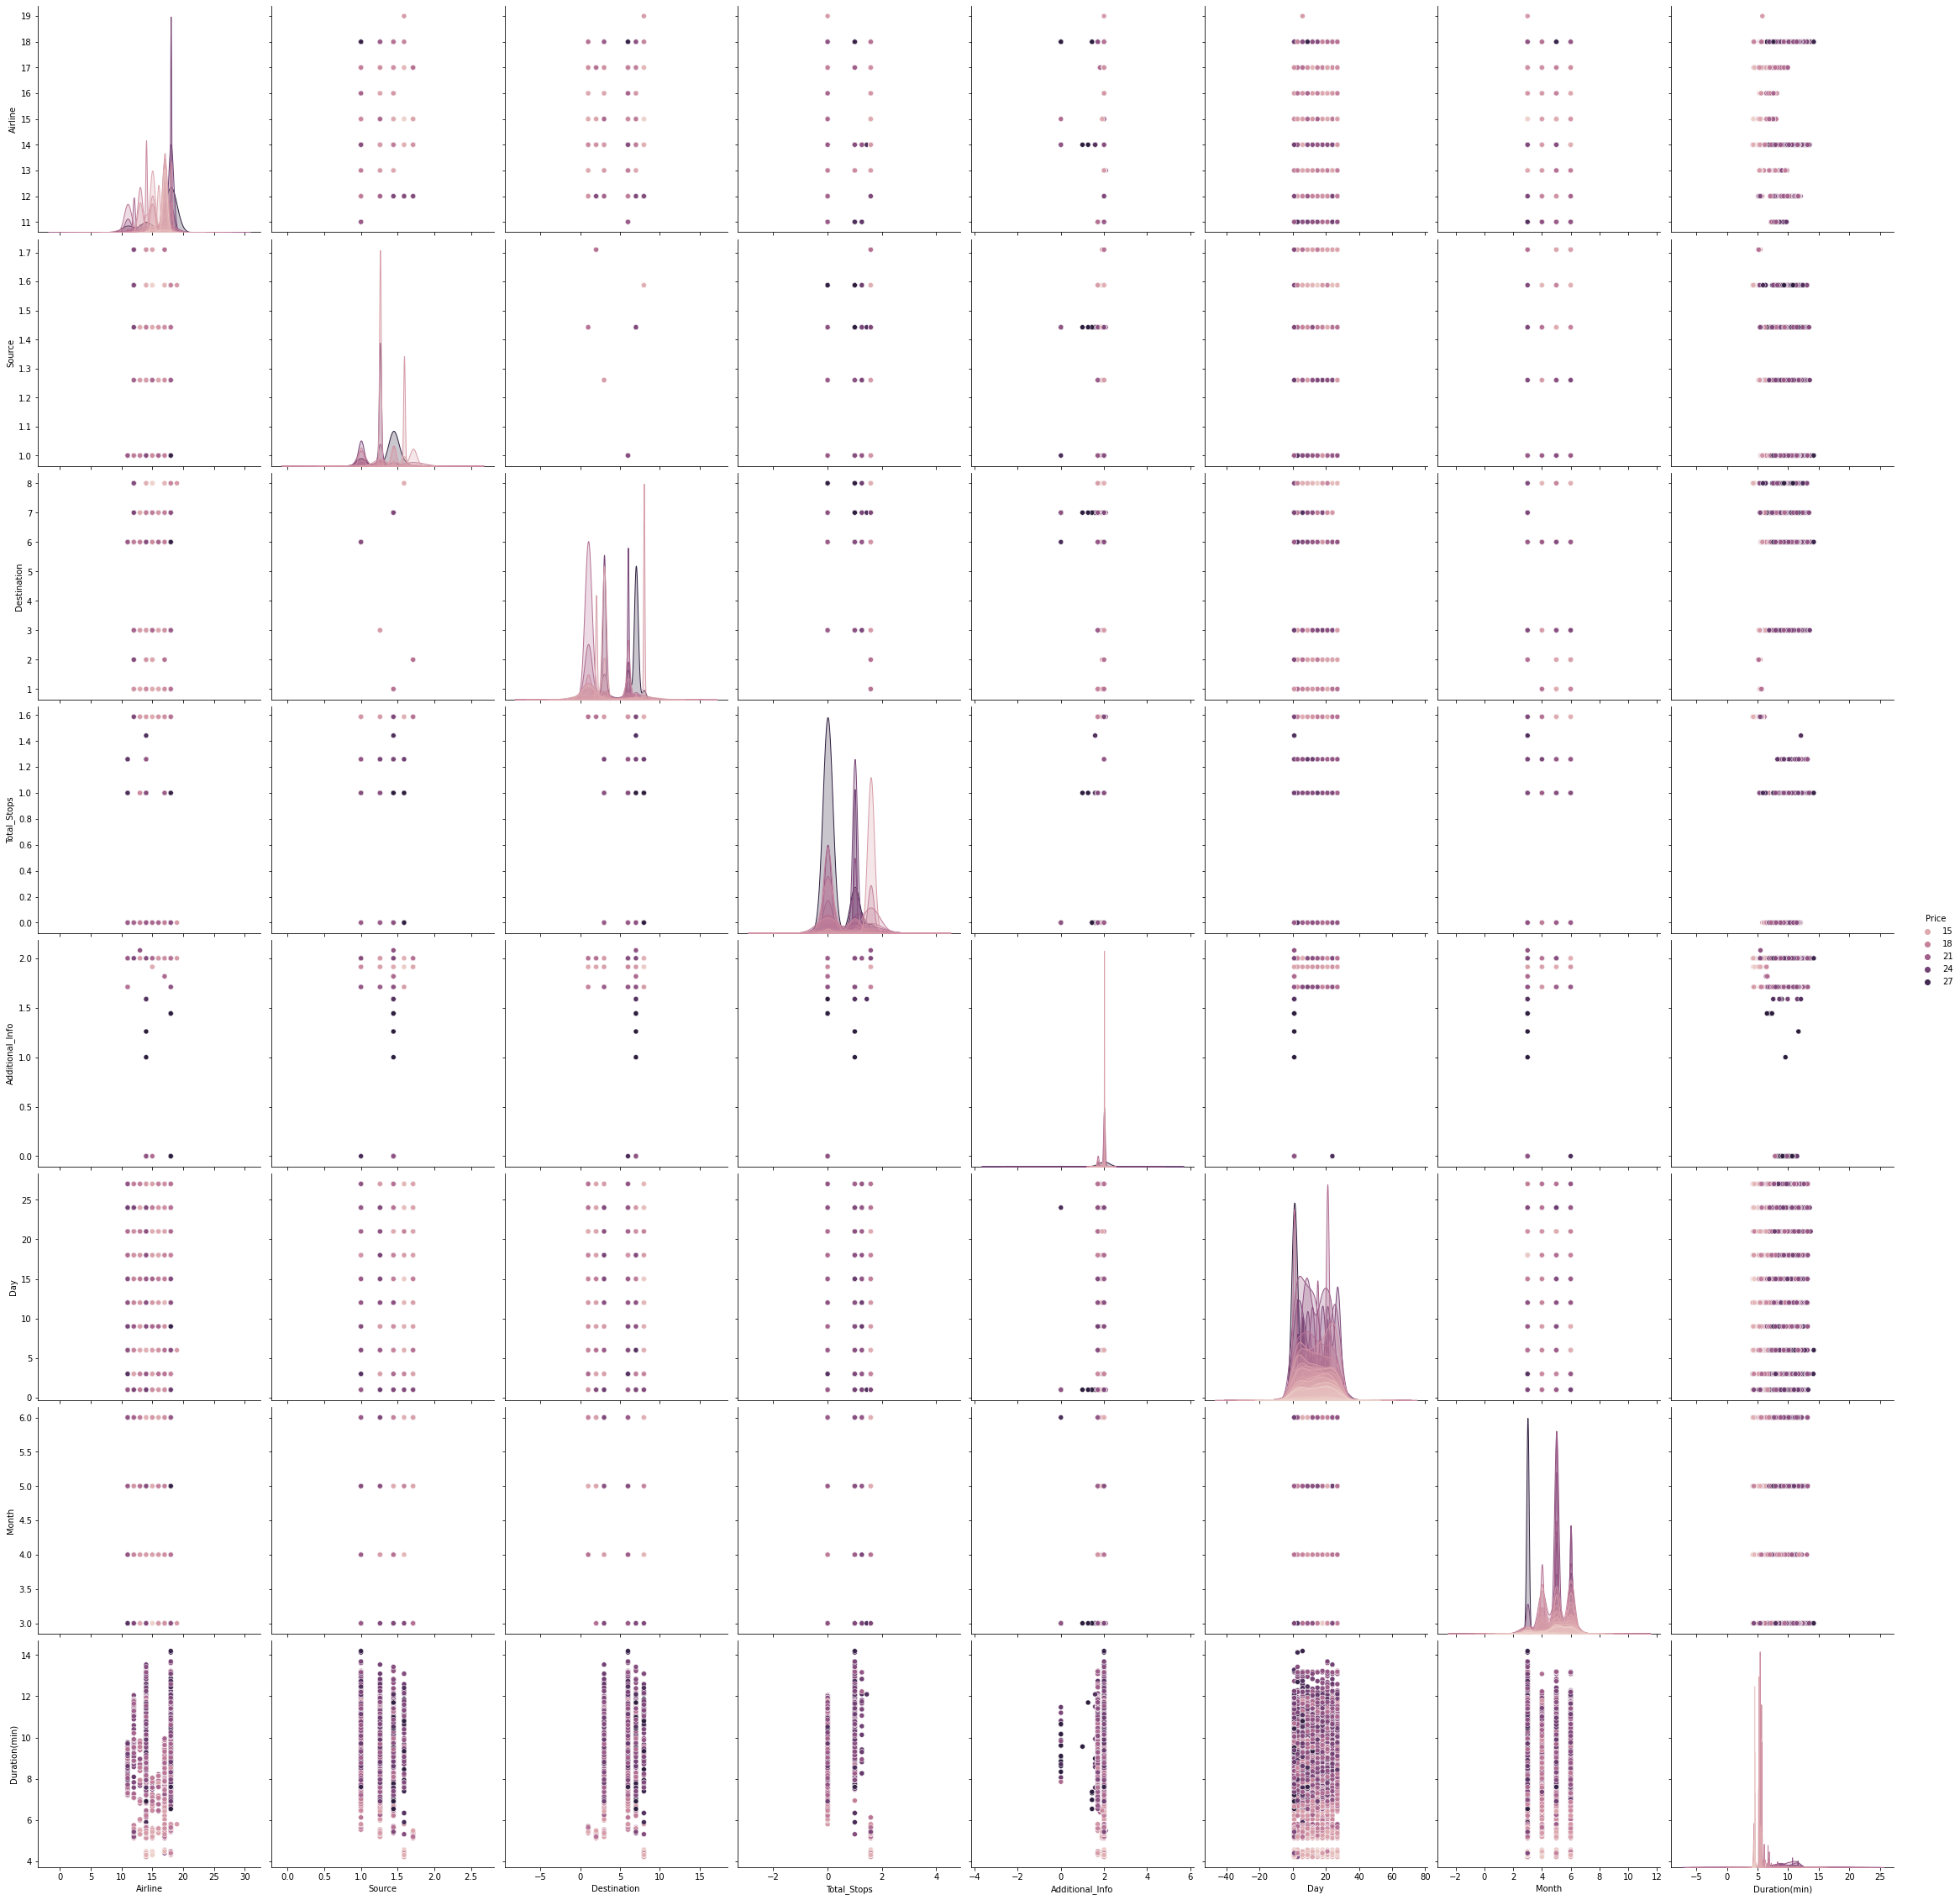

In [956]:
sns.pairplot(df_train,hue='Price',height=4)

###### Handling Outliers

###### in Train Dataset

In [1112]:
fout =['Price']
for f in fout:
    q1 = df_train[f].quantile(0.25)
    q3 = df_train[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df_train.loc[df_train[f]<lolimit,f] = lolimit
    df_train.loc[df_train[f]>uplimit,f] = uplimit

In [1113]:
#Recheck for Outliers After Removing

<AxesSubplot:>

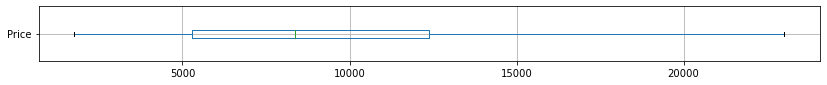

In [1114]:
df_train.boxplot(column='Price', figsize=(14,1),vert=False)

In [1115]:
df_train.shape

(10683, 11)

###### in Test Dataset

In [1116]:
fout =['Price']
for f in fout:
    q1 = df_test[f].quantile(0.25)
    q3 = df_test[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df_test.loc[df_test[f]<lolimit,f] = lolimit
    df_test.loc[df_test[f]>uplimit,f] = uplimit

In [1117]:
#Recheck for Outliers After Removing

<AxesSubplot:>

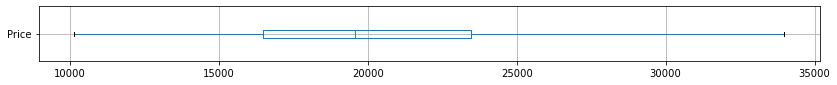

In [1118]:
df_test.boxplot(column='Price', figsize=(14,1),vert=False)

In [1119]:
df_test.shape

(2671, 11)

###### Handling Missing/Zeros Values

In [1120]:
#for train dataset

In [1121]:
print (df_train['Route'].loc[df_train['Route'].isnull()])
print (df_train['Total_Stops'].loc[df_train['Total_Stops'].isnull()])

9039    NaN
Name: Route, dtype: object
9039    NaN
Name: Total_Stops, dtype: object


In [1122]:
df_train.at[9039, 'Route'] = 'DEL → MAA → COK'
df_train.at[9039, 'Total_Stops'] = '1 stop'

In [1123]:
#Recheck null values

In [1124]:
print (df_train.isnull().sum().sum())

0


###### Handling Duplicate Rows

In [1125]:
df_train.shape

(10683, 11)

In [1126]:
sum(df_train.duplicated())

220

In [1127]:
# Removing duplicate rows
df_train=df_train.drop_duplicates()

In [1128]:
df_train.shape

(10463, 11)

###### Encoding Categorical Variable

In [1129]:
#for train dataset

In [1130]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [1131]:
le=LabelEncoder()
df_train['Route']=le.fit_transform(df_train['Route'])
df_train['Additional_Info']=le.fit_transform(df_train['Additional_Info'])
df_train['Total_Stops']=le.fit_transform(df_train['Total_Stops'])

In [1132]:
df_train.Source.replace({'Delhi':1,'Kolkata':2,'Banglore':3,'Mumbai':4,'Chennai':5},inplace=True)
df_train.Airline.replace({'Jet Airways':18,'Jet Airways Business':18,'Multiple carriers':11,
                          'Multiple carriers Premium economy':11,'Vistara':12,'Vistara Premium economy':12,
                          'Air Asia':13,'Air India':14,'SpiceJet':15,'GoAir':16,'IndiGo':17,'Trujet':19},inplace=True)
df_train.Destination.replace({'Cochin':6,'Banglore':3,'Delhi':1,'New Delhi':7,'Hyderabad':8,'Kolkata':2},inplace=True)

In [1133]:
df_train[["Day", "Month", "Year"]] = df_train["Date_of_Journey"].str.split("/", expand=True)
df_train.drop('Date_of_Journey',inplace=True,axis=1)

In [1134]:
df_train[["Arrival_hr", "Arrival_Day", "Arrival_Month"]] = df_train["Arrival_Time"].str.split(" ", expand=True)
df_train.drop(['Arrival_Time','Arrival_Month'],inplace=True,axis=1)
df_train['Arrival_Day'].fillna(df_train['Day'], inplace=True)

In [1135]:
df_train[["hr", "min"]] = df_train["Arrival_hr"].str.split(":", expand=True)
df_train["hr"]= df_train["hr"].astype(float)
df_train["min"]= df_train["min"].astype(float)
df_train['Arrival_Time']=(((df_train['hr']*60)+df_train['min'])/60).round(2)
df_train.drop(['Arrival_hr','hr','min'],inplace=True,axis=1)

In [1136]:
df_train["Source"]= df_train["Source"].astype(int)
df_train["Airline"]= df_train["Airline"].astype(int)
df_train["Destination"]= df_train["Destination"].astype(int)
df_train["Day"]= df_train["Day"].astype(int)
df_train["Month"]= df_train["Month"].astype(int)
df_train["Year"]= df_train["Year"].astype(int)
df_train["Arrival_Day"]= df_train["Arrival_Day"].astype(int)

In [1137]:
df_train[['Dep_Time_hr','Dep_Time_min']]=df_train.Dep_Time.str.split(":",expand=True)
df_train["Dep_Time_hr"]= df_train["Dep_Time_hr"].astype(float)
df_train["Dep_Time_min"]= df_train["Dep_Time_min"].astype(float)
df_train['Deperture_Time']=(((df_train['Dep_Time_hr']*60)+df_train['Dep_Time_min'])/60).round(2)
df_train.drop(['Dep_Time','Dep_Time_hr','Dep_Time_min'],inplace=True,axis=1)


In [1138]:
df_train[['Duration_hr','Duration_min']]=df_train.Duration.str.split(" ",expand=True)
indexNames = df_train[df_train['Duration_hr'] == '5m'].index
df_train.drop(indexNames , inplace=True)
df_train['Duration_hr']=df_train['Duration_hr'].str.replace('h',' ')
df_train['Duration_min']=df_train['Duration_min'].str.replace('m',' ')

In [1139]:
df_train["Duration_hr"]= df_train["Duration_hr"].astype(float)
df_train["Duration_min"]= df_train["Duration_min"].astype(float)
df_train['Duration_min']=df_train['Duration_min'].replace(np.nan,0)
df_train['Duration(min)']=(df_train['Duration_hr']*60)+df_train['Duration_min']
df_train.drop(["Duration_hr","Duration_min","Duration"],inplace=True,axis=1)

In [1140]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Day,Arrival_Time,Deperture_Time,Duration(min)
0,17,3,7,18,4,8,3897.0,24,3,2019,22,1.17,22.33,170.0
1,14,2,3,84,1,8,7662.0,1,5,2019,1,13.25,5.83,445.0
2,18,1,6,118,1,8,13882.0,9,6,2019,10,4.42,9.42,1140.0
3,17,2,3,91,0,8,6218.0,12,5,2019,12,23.50,18.08,325.0
4,17,3,7,29,0,8,13302.0,1,3,2019,1,21.58,16.83,285.0


In [1141]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10462 non-null  int32  
 1   Source           10462 non-null  int32  
 2   Destination      10462 non-null  int32  
 3   Route            10462 non-null  int32  
 4   Total_Stops      10462 non-null  int32  
 5   Additional_Info  10462 non-null  int32  
 6   Price            10462 non-null  float64
 7   Day              10462 non-null  int32  
 8   Month            10462 non-null  int32  
 9   Year             10462 non-null  int32  
 10  Arrival_Day      10462 non-null  int32  
 11  Arrival_Time     10462 non-null  float64
 12  Deperture_Time   10462 non-null  float64
 13  Duration(min)    10462 non-null  float64
dtypes: float64(4), int32(10)
memory usage: 817.3 KB


In [1142]:
#for test dataset

In [1143]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612.0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572.0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778.0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934.0


In [1144]:
le=LabelEncoder()
df_test['Route']=le.fit_transform(df_test['Route'])
df_test['Additional_Info']=le.fit_transform(df_test['Additional_Info'])
df_test['Total_Stops']=le.fit_transform(df_test['Total_Stops'])

In [1145]:
df_test.Source.replace({'Delhi':1,'Kolkata':2,'Banglore':3,'Mumbai':4,'Chennai':5},inplace=True)
df_test.Airline.replace({'Jet Airways':18,'Jet Airways Business':18,'Multiple carriers':11,'Multiple carriers Premium economy':11,
                          'Vistara':12,'Vistara Premium economy':12,'Air Asia':13,'Air India':14,'SpiceJet':15,'GoAir':16,
                          'IndiGo':17,'Trujet':19},inplace=True)
df_test.Destination.replace({'Cochin':6,'Banglore':3,'Delhi':1,'New Delhi':7,'Hyderabad':8,'Kolkata':2},inplace=True)


In [1146]:
df_test[["Day", "Month", "Year"]] = df_test["Date_of_Journey"].str.split("/", expand=True)
df_test.drop('Date_of_Journey',inplace=True,axis=1)

In [1147]:
df_test[["Arrival_hr", "Arrival_Day", "Arrival_Month"]] = df_test["Arrival_Time"].str.split(" ", expand=True)
df_test.drop(['Arrival_Time','Arrival_Month'],inplace=True,axis=1)
df_test['Arrival_Day'].fillna(df_test['Day'], inplace=True)

In [1148]:
df_test[["hr", "min"]] = df_test["Arrival_hr"].str.split(":", expand=True)
df_test["hr"]= df_test["hr"].astype(float)
df_test["min"]= df_test["min"].astype(float)
df_test['Arrival_Time']=(((df_test['hr']*60)+df_test['min'])/60).round(2)
df_test.drop(['Arrival_hr','hr','min'],inplace=True,axis=1)

In [1149]:
df_test["Source"]= df_test["Source"].astype(int)
df_test["Airline"]= df_test["Airline"].astype(int)
df_test["Destination"]= df_test["Destination"].astype(int)
df_test["Day"]= df_test["Day"].astype(int)
df_test["Month"]= df_test["Month"].astype(int)
df_test["Year"]= df_test["Year"].astype(int)
df_test["Arrival_Day"]= df_test["Arrival_Day"].astype(int)

In [1150]:
df_test[['Dep_Time_hr','Dep_Time_min']]=df_test.Dep_Time.str.split(":",expand=True)
df_test["Dep_Time_hr"]= df_test["Dep_Time_hr"].astype(float)
df_test["Dep_Time_min"]= df_test["Dep_Time_min"].astype(float)
df_test['Deperture_Time']=(((df_test['Dep_Time_hr']*60)+df_test['Dep_Time_min'])/60).round(2)
df_test.drop(['Dep_Time','Dep_Time_hr','Dep_Time_min'],inplace=True,axis=1)

In [1151]:
df_test[['Duration_hr','Duration_min']]=df_test.Duration.str.split(" ",expand=True)
indexNames = df_test[df_test['Duration_hr'] == '5m'].index
df_test.drop(indexNames , inplace=True)
df_test['Duration_hr']=df_test['Duration_hr'].str.replace('h',' ')
df_test['Duration_min']=df_test['Duration_min'].str.replace('m',' ')

In [1152]:
df_test["Duration_hr"]= df_test["Duration_hr"].astype(float)
df_test["Duration_min"]= df_test["Duration_min"].astype(float)
df_test['Duration_min']=df_test['Duration_min'].replace(np.nan,0)
df_test['Duration(min)']=(df_test['Duration_hr']*60)+df_test['Duration_min']
df_test.drop(["Duration_hr","Duration_min","Duration"],inplace=True,axis=1)

In [1153]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Day,Arrival_Time,Deperture_Time,Duration(min)
0,18,1,6,76,0,5,15998.0,6,6,2019,7,4.42,17.50,655.0
1,17,2,3,65,0,5,16612.0,12,5,2019,12,10.33,6.33,240.0
2,18,1,6,76,0,3,25572.0,21,5,2019,22,19.00,19.25,1425.0
3,11,1,6,76,0,5,25778.0,21,5,2019,21,21.00,8.00,780.0
4,13,3,1,16,4,5,16934.0,24,6,2019,25,2.75,23.92,170.0


In [1154]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          2670 non-null   int32  
 1   Source           2670 non-null   int32  
 2   Destination      2670 non-null   int32  
 3   Route            2670 non-null   int32  
 4   Total_Stops      2670 non-null   int32  
 5   Additional_Info  2670 non-null   int32  
 6   Price            2670 non-null   float64
 7   Day              2670 non-null   int32  
 8   Month            2670 non-null   int32  
 9   Year             2670 non-null   int32  
 10  Arrival_Day      2670 non-null   int32  
 11  Arrival_Time     2670 non-null   float64
 12  Deperture_Time   2670 non-null   float64
 13  Duration(min)    2670 non-null   float64
dtypes: float64(4), int32(10)
memory usage: 208.6 KB


###### Handling Skewness

In [1155]:
#for train dataset

In [1156]:
df_train[['Price']]= np.cbrt(df_train[['Price']])
#df_train[['Airline']]= np.cbrt(df_train[['Airline']])
df_train[['Source']]= np.cbrt(df_train[['Source']])
df_train[['Total_Stops']]= np.cbrt(df_train[['Total_Stops']])
df_train[['Additional_Info']]= np.cbrt(df_train[['Additional_Info']])
df_train[['Duration(min)']]= np.cbrt(df_train[['Duration(min)']])     

In [1157]:
df_train.skew()

Airline           -0.666270
Source             0.401416
Destination       -0.317549
Route             -0.482133
Total_Stops        0.302487
Additional_Info   -5.594168
Price              0.003992
Day                0.124628
Month             -0.377839
Year               0.000000
Arrival_Day        0.125670
Arrival_Time      -0.379736
Deperture_Time     0.122672
Duration(min)      0.197664
dtype: float64

In [1158]:
#for test dataset

In [1159]:
#df_test[['Airline']]= np.cbrt(df_test[['Airline']])
df_test[['Source']]= np.cbrt(df_test[['Source']])
df_test[['Total_Stops']]= np.cbrt(df_test[['Total_Stops']])
df_test[['Additional_Info']]= np.cbrt(df_test[['Additional_Info']])
df_test[['Duration(min)']]= np.cbrt(df_test[['Duration(min)']])

In [1160]:
#df_test[['Price']]= np.cbrt(df_test[['Price']])

In [1161]:
df_test.skew()

Airline           -0.582524
Source             0.408515
Destination       -0.379890
Route             -0.282578
Total_Stops        0.312198
Additional_Info   -2.918432
Price              0.423510
Day                0.199380
Month             -0.404578
Year               0.000000
Arrival_Day        0.199796
Arrival_Time      -0.443069
Deperture_Time     0.110616
Duration(min)      0.165237
dtype: float64

###### Feature Selection

In [1162]:
#for train 

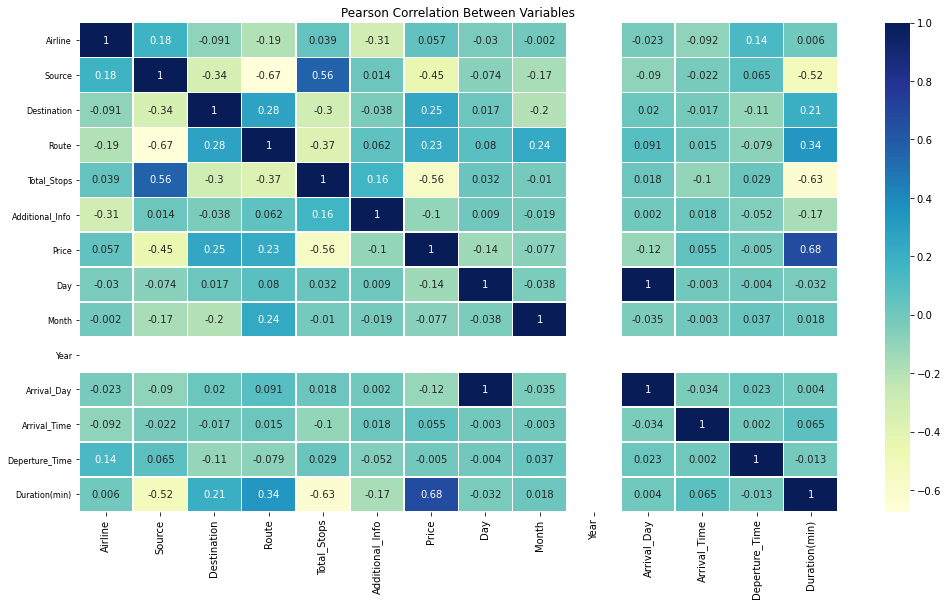

In [1163]:
# Variable Correlation
pcorrel = df_train.corr(method='pearson').round(3)
plt.figure(figsize=(17,9)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()        
    

*Observation :*<br>*Airline,Additional_Info,Price,Month,Year,Arrival_Time,Deperture_Time column is less correlated to Price*

In [1164]:
# Check Strongly Related Features  in train dataset
cor = df_train.corr()
cor_target = abs(cor["Price"])
strong_related = cor_target[cor_target>0.2]
print("Strongly Related:\n\n",strong_related,"\n")

weak_related = cor_target[cor_target<0.2]
print("Weak Relates:\n\n",weak_related)

Strongly Related:

 Source           0.445196
Destination      0.254297
Route            0.227548
Total_Stops      0.565336
Price            1.000000
Duration(min)    0.678395
Name: Price, dtype: float64 

Weak Relates:

 Airline            0.056754
Additional_Info    0.103313
Day                0.136873
Month              0.076626
Arrival_Day        0.115740
Arrival_Time       0.055009
Deperture_Time     0.005498
Name: Price, dtype: float64


In [1165]:
#for test dataset

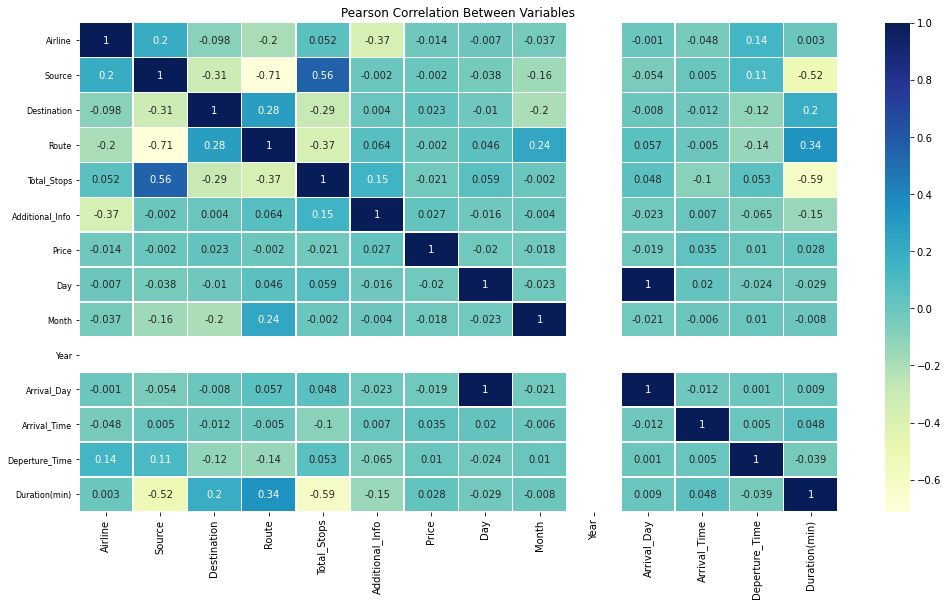

In [1166]:
# Variable Correlation
pcorrel = df_test.corr(method='pearson').round(3)
plt.figure(figsize=(17,9)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()        
    

In [1167]:
# Check Strongly Related Features  in train dataset
cor = df_test.corr()
cor_target = abs(cor["Price"])
strong_related = cor_target[cor_target>0.2]
print("Strongly Related:\n\n",strong_related,"\n")

weak_related = cor_target[cor_target<0.2]
print("Weak Relates:\n\n",weak_related)

Strongly Related:

 Price    1.0
Name: Price, dtype: float64 

Weak Relates:

 Airline            0.014303
Source             0.001859
Destination        0.023085
Route              0.002210
Total_Stops        0.021351
Additional_Info    0.027354
Day                0.020144
Month              0.017748
Arrival_Day        0.018798
Arrival_Time       0.035292
Deperture_Time     0.009811
Duration(min)      0.028017
Name: Price, dtype: float64


In [1168]:
#df_train.drop(['Airline','Additional_Info','Day','Month','Year'],inplace=True,axis=1)

#'Airline', 'Source', 'Destination', 'Total_Stops','Additional_Info', 'Price', 'Day', 'Month', 'Duration_bool'

In [1169]:
df_train.drop(['Route','Year','Arrival_Day','Arrival_Time','Deperture_Time'],inplace=True,axis=1)
df_test.drop(['Route','Year','Arrival_Day','Arrival_Time','Deperture_Time'],inplace=True,axis=1)

###### split target and feature variables

In [1170]:
#for train dataset

In [1171]:
y_train=df_train[['Price']]
X_train=df_train.drop(['Price'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (10462, 1)
X_train : (10462, 8)


In [1172]:
#for test dataset

In [1173]:
y_test=df_test[['Price']]
X_test=df_test.drop(['Price'],axis=1)

print("y_train :",y_test.shape)
print("X_train :",X_test.shape)

y_train : (2670, 1)
X_train : (2670, 8)


In [1174]:
#selected features

In [1175]:
#for train 

In [1176]:
X_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Day', 'Month', 'Duration(min)'],
      dtype='object')

In [1177]:
y_train.columns

Index(['Price'], dtype='object')

In [1178]:
#for test

In [1179]:
X_test.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Day', 'Month', 'Duration(min)'],
      dtype='object')

In [1180]:
y_test.columns

Index(['Price'], dtype='object')

###### Normilization of data

In [1181]:
#for train data

In [1182]:
from sklearn.preprocessing import power_transform
xtrain=power_transform(X_train,method='yeo-johnson')
xtrain

array([[ 0.45565011,  1.01209135,  1.11377505, ...,  1.16943307,
        -1.39899055, -1.04814629],
       [-0.85479913,  0.29720758, -0.79473499, ..., -1.71529744,
         0.17094688, -0.03261622],
       [ 1.05447341, -1.09693192,  0.61878232, ..., -0.3992424 ,
         1.18015059,  1.07291717],
       ...,
       [ 1.05447341,  1.01209135, -1.6523717 , ...,  1.43117238,
        -0.6891619 , -0.99101052],
       [-1.40364013,  1.01209135,  1.11377505, ..., -1.71529744,
        -1.39899055, -1.10831235],
       [-0.85479913, -1.09693192,  0.61878232, ..., -0.3992424 ,
         0.17094688,  0.09820344]])

In [1183]:
#for test data

In [1184]:
from sklearn.preprocessing import power_transform
xtest=power_transform(X_test,method='yeo-johnson')
xtest

array([[ 1.07876785, -1.07519647,  0.57967594, ..., -0.75330224,
         1.16258691,  0.37436334],
       [ 0.51896529,  0.33608707, -0.84773002, ...,  0.0390449 ,
         0.14449988, -0.7310277 ],
       [ 1.07876785, -1.07519647,  0.57967594, ...,  0.9683067 ,
         0.14449988,  1.3440447 ],
       ...,
       [ 1.07876785, -1.07519647,  0.57967594, ..., -0.75330224,
        -1.4010437 , -0.20238217],
       [-0.76612381, -1.07519647,  0.57967594, ..., -0.75330224,
        -1.4010437 ,  0.77870264],
       [-1.56582438, -1.07519647,  0.57967594, ...,  0.37321435,
         1.16258691,  0.70229688]])

###### Sandardization of data

In [1185]:
sc = StandardScaler()
Xtrain = sc.fit_transform(xtrain)
print(Xtrain)
Xtest = sc.fit_transform(xtest)
print(Xtest)

[[ 0.45565011  1.01209135  1.11377505 ...  1.16943307 -1.39899055
  -1.04814629]
 [-0.85479913  0.29720758 -0.79473499 ... -1.71529744  0.17094688
  -0.03261622]
 [ 1.05447341 -1.09693192  0.61878232 ... -0.3992424   1.18015059
   1.07291717]
 ...
 [ 1.05447341  1.01209135 -1.6523717  ...  1.43117238 -0.6891619
  -0.99101052]
 [-1.40364013  1.01209135  1.11377505 ... -1.71529744 -1.39899055
  -1.10831235]
 [-0.85479913 -1.09693192  0.61878232 ... -0.3992424   0.17094688
   0.09820344]]
[[ 1.07876785 -1.07519647  0.57967594 ... -0.75330224  1.16258691
   0.37436334]
 [ 0.51896529  0.33608707 -0.84773002 ...  0.0390449   0.14449988
  -0.7310277 ]
 [ 1.07876785 -1.07519647  0.57967594 ...  0.9683067   0.14449988
   1.3440447 ]
 ...
 [ 1.07876785 -1.07519647  0.57967594 ... -0.75330224 -1.4010437
  -0.20238217]
 [-0.76612381 -1.07519647  0.57967594 ... -0.75330224 -1.4010437
   0.77870264]
 [-1.56582438 -1.07519647  0.57967594 ...  0.37321435  1.16258691
   0.70229688]]


In [1186]:
print("y_train :",y_train.shape)
print("X_train :",Xtrain.shape)
print("y_train :",y_test.shape)
print("X_train :",Xtest.shape)

y_train : (10462, 1)
X_train : (10462, 8)
y_train : (2670, 1)
X_train : (2670, 8)


###### Model Building

In [1187]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [1188]:
#Linear Regression

In [1189]:
LRregressor = LinearRegression()
LRregressor.fit(Xtrain, y_train)
LRy_pred = LRregressor.predict(Xtest)
print(LRy_pred)

[[22.54394526]
 [19.26766455]
 [22.92442749]
 ...
 [22.09335344]
 [22.98247315]
 [21.23994249]]


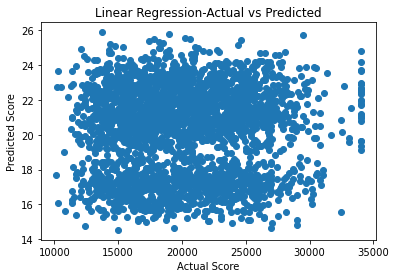

In [1190]:
plt.scatter(y_test,LRy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression-Actual vs Predicted')
plt.show()

In [1191]:
#Evaluation

In [1192]:
# Calculating R2 Score
LRr2_score_train =LRregressor.score(Xtrain, y_train)
print('\nr2 Score On Train Data:',LRr2_score_train)
LRr2_score_test=LRregressor.score(Xtest,y_test)
print('\nr2 Score On Test Data:',LRr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, LRy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, LRy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LRy_pred)))


r2 Score On Train Data: 0.5609281194196349

r2 Score On Test Data: -18.533223655192327


Mean Absolute Error: 20063.06546944611

Mean Squared Error: 424245021.6136259

Root Mean Squared Error: 20597.209073406666


In [1193]:
#Validation

In [1194]:
LRscores = cross_val_score(LRregressor,Xtrain, y_train, cv=5)
print('\nCross Validation')
print('Linear Regression Score:',LRscores)
LRcross=round(LRscores.mean(),4)
print('Average LinearRegression score:',LRcross)


Cross Validation
Linear Regression Score: [0.5738621  0.58742375 0.56008767 0.53436942 0.54326978]
Average LinearRegression score: 0.5598


In [1195]:
#Lasso Regressor

In [1196]:
LSregressor = Lasso()
LSregressor.fit(Xtrain, y_train)
LSy_pred = LSregressor.predict(Xtest)
print(LSy_pred)

[20.73457087 19.24371405 22.04239408 ... 19.95670589 21.2799091
 21.17685957]


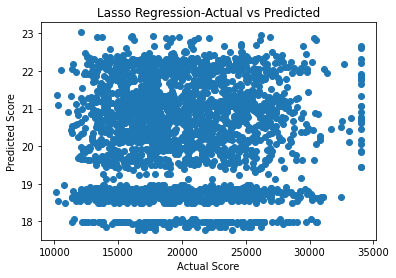

In [1197]:
plt.scatter(y_test,LSy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Lasso Regression-Actual vs Predicted')
plt.show()

In [1198]:
#Evaluation

In [1199]:
# Calculating R2 Score
LSr2_score_train =LSregressor.score(Xtrain, y_train)
print('\nr2 Score On Train Data:',LSr2_score_train)
LSr2_score_test=LSregressor.score(Xtest,y_test)
print('\nr2 Score On Test Data:',LSr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, LSy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, LSy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LSy_pred)))


r2 Score On Train Data: 0.40285859759194687

r2 Score On Test Data: -18.533241333636337


Mean Absolute Error: 20063.065469446112

Mean Squared Error: 424245405.5744095

Root Mean Squared Error: 20597.21839410384


In [1200]:
#validation

In [1201]:
LSscores = cross_val_score(LSregressor,Xtrain, y_train, cv=5)
print('\nCross Validation')
print('Lasso Regression Score:',LSscores)
LScross=round(LSscores.mean(),4)
print('Average Lasso Regression score:',LScross)


Cross Validation
Lasso Regression Score: [0.4003946  0.41375172 0.40244621 0.39473425 0.39909398]
Average Lasso Regression score: 0.4021


In [1202]:
# DecisionTree Regressor

In [1203]:
DTregressor =  DecisionTreeRegressor(max_depth=6,criterion='mse')
DTregressor.fit(Xtrain, y_train)
DTy_pred = DTregressor.predict(Xtest)
print(DTy_pred)

[24.81915785 17.62981487 26.48640575 ... 24.81915785 23.97425925
 21.28639372]


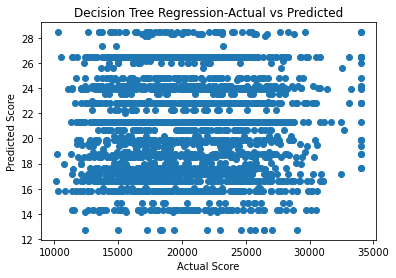

In [1204]:
plt.scatter(y_test,DTy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Decision Tree Regression-Actual vs Predicted')
plt.show()

In [1205]:
#Evaluation

In [1206]:
# Calculating R2 Score
DTr2_score_train =DTregressor.score(Xtrain, y_train)
print('\nr2 Score On Train Data:',DTr2_score_train)
DTr2_score_test=DTregressor.score(Xtest,y_test)
print('\nr2 Score On Test Data:',DTr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test,DTy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test,DTy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,DTy_pred)))



r2 Score On Train Data: 0.8315851426032463

r2 Score On Test Data: -18.53194893298901


Mean Absolute Error: 20062.36235018892

Mean Squared Error: 424217335.73042285

Root Mean Squared Error: 20596.536983930644


In [1207]:
#Validation

In [1208]:
DTscores = cross_val_score(DTregressor,Xtrain, y_train, cv=5)
print('\nCross Validation')
print('Decision Tree Regression Score:',DTscores)

DTcross=round(DTscores.mean(),4)
print('Average Decision Tree Regression score:',DTcross)


Cross Validation
Decision Tree Regression Score: [0.81894293 0.82513649 0.827285   0.8034973  0.82061031]
Average Decision Tree Regression score: 0.8191


In [1209]:
#RandomForest Regressor

In [1210]:
RFregressor = RandomForestRegressor()
RFregressor.fit(Xtrain, y_train)
RFy_pred = RFregressor.predict(Xtest)
print(RFy_pred)

[24.5043724  16.35584906 27.12694638 ... 25.2321731  22.70143309
 20.3018208 ]


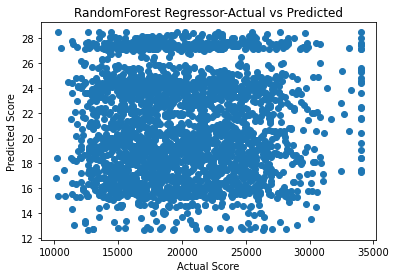

In [1211]:
plt.scatter(y_test,RFy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('RandomForest Regressor-Actual vs Predicted')
plt.show()

In [1212]:
#Evaluation

In [1213]:
# Calculating R2 Score
RFr2_score_train =RFregressor.score(Xtrain, y_train)
print('\nr2 Score On Train Data:',RFr2_score_train)
RFr2_score_test=RFregressor.score(Xtest,y_test)
print('\nr2 Score On Test Data:',RFr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, RFy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, RFy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, RFy_pred)))


r2 Score On Train Data: 0.9719754942775458

r2 Score On Test Data: -18.53164928901921


Mean Absolute Error: 20062.188258712475

Mean Squared Error: 424210827.7179878

Root Mean Squared Error: 20596.37899529885


In [1214]:
#validation

In [1215]:
RFscores = cross_val_score(RFregressor,Xtrain, y_train, cv=5)
print('\nCross Validation')
print('Random Forest Regression Score:',RFscores)

RFcross=round(RFscores.mean(),4)
print('Average Random Forest Regression score:',RFcross)


Cross Validation
Random Forest Regression Score: [0.90229712 0.89421588 0.90384888 0.89432917 0.89333337]
Average Random Forest Regression score: 0.8976


In [1216]:
#KNeighbors Regressor

In [1217]:
KNNregressor =  KNeighborsRegressor(n_neighbors=2)
KNNregressor.fit(Xtrain, y_train)
KNNy_pred = KNNregressor.predict(Xtest)
print(KNNy_pred)

[[24.5043724 ]
 [16.77473171]
 [23.45168889]
 ...
 [25.39941247]
 [22.7911768 ]
 [20.75730659]]


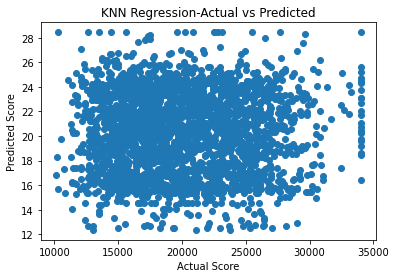

In [1218]:
plt.scatter(y_test,KNNy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('KNN Regression-Actual vs Predicted')
plt.show()

In [1219]:
#Evaluation

In [1220]:
# Calculating R2 Score
KNNr2_score_train =KNNregressor.score(Xtrain, y_train)
print('\nr2 Score On Train Data:',KNNr2_score_train)
KNNr2_score_test=KNNregressor.score(Xtest,y_test)
print('\nr2 Score On Test Data:',KNNr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, KNNy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, KNNy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, KNNy_pred)))


r2 Score On Train Data: 0.9372054281250777

r2 Score On Test Data: -18.533075399387126


Mean Absolute Error: 20062.97506278

Mean Squared Error: 424241801.62350076

Root Mean Squared Error: 20597.13090756819


In [1221]:
#Validation

In [1222]:
KNNscores = cross_val_score(KNNregressor,Xtrain, y_train, cv=5)
print('\nCross Validation')
print('KNN Regression Score:',KNNscores)
KNNcross=round(KNNscores.mean(),4)
print('Average KNN Regression score:',KNNcross)


Cross Validation
KNN Regression Score: [0.83408836 0.8280807  0.84306555 0.81738828 0.83145853]
Average KNN Regression score: 0.8308


In [1223]:
#Ridge Regressor

In [1224]:
RRregressor =  Ridge()
RRregressor.fit(Xtrain, y_train)
RRy_pred = RRregressor.predict(Xtest)
print(RRy_pred)

[[22.5438613 ]
 [19.26789387]
 [22.92433177]
 ...
 [22.09341491]
 [22.98238151]
 [21.23998684]]


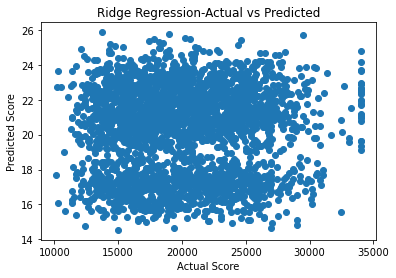

In [1225]:
plt.scatter(y_test,RRy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Ridge Regression-Actual vs Predicted')
plt.show()

In [1226]:
#Evaluation

In [1227]:
# Calculating R2 Score
RRr2_score_train =RRregressor.score(Xtrain, y_train)
print('\nr2 Score On Train Data:',RRr2_score_train)
RRr2_score_test=RRregressor.score(Xtest,y_test)
print('\nr2 Score On Test Data:',RRr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, RRy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, RRy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, RRy_pred)))


r2 Score On Train Data: 0.560928113944307

r2 Score On Test Data: -18.533223658623754


Mean Absolute Error: 20063.065469446112

Mean Squared Error: 424245021.6881536

Root Mean Squared Error: 20597.209075215836


In [1228]:
#Validation

In [1229]:
RRscores = cross_val_score(RRregressor,Xtrain, y_train, cv=5)
print('\nCross Validation')
print('Ridge Regression Score:',RRscores)
RRcross=round(RRscores.mean(),4)
print('Average Ridge Regression score:',RRcross)


Cross Validation
Ridge Regression Score: [0.57385922 0.58742095 0.56008669 0.53437351 0.54327291]
Average Ridge Regression score: 0.5598


###### Compare Models

In [1230]:
trainscore=[LRr2_score_train,LSr2_score_train,RRr2_score_train,DTr2_score_train,RFr2_score_train,KNNr2_score_train]
testscore=[LRr2_score_test,LSr2_score_test,RRr2_score_test,DTr2_score_test,RFr2_score_test,KNNr2_score_test]
VAlscore=[LRcross,LScross,RRcross,DTcross,RFcross,KNNcross]
col={'Train Score':trainscore,'Test Score':testscore,'Validation':VAlscore}
models=['Linear Regression','Lasso','Ridge','Decision Tree','Random Forest','KNN']
dfp=pd.DataFrame(data=col,index=models)
dfp

,Train Score,Test Score,Validation
Linear Regression,0.560928,-18.533224,0.5598
Lasso,0.402859,-18.533241,0.4021
Ridge,0.560928,-18.533224,0.5598
Decision Tree,0.831585,-18.531949,0.8191
Random Forest,0.971975,-18.531649,0.8976
KNN,0.937205,-18.533075,0.8308


<AxesSubplot:>

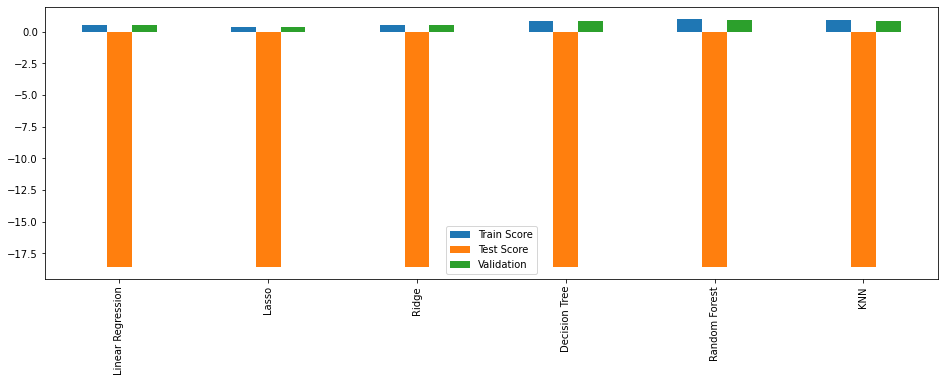

In [1231]:
dfp.plot(kind='bar',figsize=(16,5))

###### Hyperparameter Tunining

In [1232]:
#for KNN

In [952]:
n_neighbors= [1,5,4,10,30,15,20,100]
weights=['uniform','distance']
algorithm=['auto','ball_tree','kd_tree','brute']
leaf_size=[1,2,4,6,12,10,25,50]
p=[1,2,5,7,10,20,24]
n_jobs= [1,5,10, 100,200,500]

param_distributions = dict(n_neighbors=n_neighbors,
                           weights=weights,
                           algorithm=algorithm,
                           leaf_size=leaf_size,
                           p=p,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=KNNregressor,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(Xtrain, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  nan
Best Params:  {'weights': 'uniform', 'p': 10, 'n_neighbors': 4, 'n_jobs': 5, 'leaf_size': 1, 'algorithm': 'auto'}


In [ ]:
#for Random Forest Regressor

In [1234]:
n_estimators=[10, 50,5,90, 200, 110, 500]
criterion = ['mse','mae']
max_depth = [2,4,6,8,10]
min_samples_split=[1,5,3,1.5,3.9,10]
min_samples_leaf=[0.0,0.5]
min_weight_fraction_leaf=[1.4,3.5,1.2,0.5]
max_features=['auto','sqrt','log2']
max_leaf_nodes=[4,6,12,10,25,50]
verbose = [1,5,4,10,15]
random_state= [1,5,10, 100,200,500]
n_jobs= [1,5,10, 100,200]

param_distributions = dict(n_estimators=n_estimators,
                           criterion = criterion,
                           max_depth = max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           max_features=max_features,
                           max_leaf_nodes=max_leaf_nodes,
                           verbose = verbose,
                           random_state= random_state,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=RFregressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=100)
random_result = random.fit(Xtrain, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110building tree 5 of 110building tree 6 of 110
building tree 7 of 110


building tree 8 of 110building tree 9 of 110

building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110building tree 15 of 110
building tree 16 of 110building tree 17 of 110

building tree 18 of 110building tree 19 of 110


building tree 20 of 110building tree 21 of 110

building tree 22 of 110building tree 23 of 110

building tree 24 of 110building tree 25 of 110building tree 26 of 110


building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110building tree 31 of 110
building tree 32 of 110

building tree 33 of 110
building tree 34 of 110
building tree 35 of 110building tree 36 of 110
building tree 37 of 110building tree 38 of 110
building tree 39 of 110
building tree 40 of 110


[Parallel(n_jobs=100)]: Done   3 out of 110 | elapsed:    0.2s remaining:   10.0s
[Parallel(n_jobs=100)]: Done  26 out of 110 | elapsed:    0.3s remaining:    1.2s


building tree 41 of 110building tree 42 of 110

building tree 43 of 110
building tree 44 of 110


building tree 45 of 110building tree 46 of 110
building tree 47 of 110

building tree 48 of 110
building tree 49 of 110
building tree 50 of 110building tree 51 of 110

building tree 52 of 110building tree 53 of 110

building tree 54 of 110
building tree 55 of 110building tree 56 of 110building tree 57 of 110building tree 58 of 110building tree 59 of 110



building tree 60 of 110building tree 61 of 110

building tree 62 of 110
building tree 63 of 110
building tree 64 of 110building tree 65 of 110
building tree 66 of 110building tree 67 of 110building tree 68 of 110

building tree 69 of 110building tree 70 of 110building tree 71 of 110

building tree 72 of 110building tree 73 of 110
building tree 74 of 110

building tree 75 of 110


building tree 76 of 110building tree 77 of 110building tree 78 of 110

building tree 79 of 110building tree 80 of 110


building tree 81 of 110building tree 82 

[Parallel(n_jobs=100)]: Done  49 out of 110 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=100)]: Done  72 out of 110 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=100)]: Done  95 out of 110 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=100)]: Done 110 out of 110 | elapsed:    0.5s finished


###### Final MOdel

Choosing the Random forest as Final Model
It Final Accuracy is higher than other and its the same train Accuracy

In [1243]:
df=pd.concat([df_train,df_test],axis=0)

yfull=df[['Price']]
Xfull=df.drop(['Price'],axis=1)

In [1244]:
print(Xfull.shape)
print(yfull.shape)

(13132, 8)
(13132, 1)


In [1246]:
PScaler=StandardScaler()
PScalerFit=PScaler.fit(Xfull)
xfull=PScalerFit.transform(Xfull)
print("x_full data :",xfull.shape)
print("y_full data :",yfull.shape)

x_full data : (13132, 8)
y_full data : (13132, 1)


In [1247]:
regressor = RandomForestRegressor(verbose=5,random_state=10,n_jobs=100,n_estimators=110,min_weight_fraction_leaf=0.5,min_samples_split=3,min_samples_leaf=0.5,max_leaf_nodes=6,max_features='auto',max_depth=8,criterion='mse')
Final_Model=regressor.fit(xfull,yfull)

# Calculating R2 Score
r2_score =regressor.score(xfull, yfull)
print('Final Score:',r2_score)

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   3 out of 110 | elapsed:    0.1s remaining:    5.6s


building tree 1 of 110
building tree 2 of 110building tree 3 of 110

building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 8 of 110
building tree 7 of 110building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110

building tree 14 of 110
building tree 15 of 110
building tree 16 of 110building tree 17 of 110building tree 18 of 110
building tree 19 of 110building tree 20 of 110
building tree 21 of 110building tree 22 of 110


building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110


building tree 28 of 110building tree 29 of 110
building tree 30 of 110

building tree 31 of 110
building tree 32 of 110building tree 33 of 110

building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110building tree 39 of 110building tree 40 of 110

building tree 41 of 110
building tree 42 of 110
bu

[Parallel(n_jobs=100)]: Done  26 out of 110 | elapsed:    0.2s remaining:    0.8s
[Parallel(n_jobs=100)]: Done  49 out of 110 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=100)]: Done  72 out of 110 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=100)]: Done  95 out of 110 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=100)]: Done 110 out of 110 | elapsed:    0.4s finished
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.


Final Score: -2.72497853170961e-07


[Parallel(n_jobs=100)]: Done   3 out of 110 | elapsed:    0.0s remaining:    2.9s
[Parallel(n_jobs=100)]: Done  26 out of 110 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=100)]: Done  49 out of 110 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=100)]: Done  72 out of 110 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=100)]: Done  95 out of 110 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=100)]: Done 110 out of 110 | elapsed:    0.0s finished


###### Model Saving

In [1248]:
import pickle
filename='FlightPrice.pk1'
pickle.dump(regressor,open(filename,'wb'))
print("Model Saved")

Model Saved
